In [1]:
!virtualenv env
!source env/bin/activate
!pip install tensorflow_io
!pip install tensorflow
!pip install matplotlib



/bin/bash: virtualenv: command not found
/bin/bash: env/bin/activate: No such file or directory
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.0/28.0 MB 58.4 MB/s eta 0:00:00


In [2]:
import os
import tensorflow as tf
from matplotlib import pyplot as plt
import tensorflow_io as tfio


In [3]:
def load_wav_16k_mono(file_name):
    file_content=tf.io.read_file(file_name)
    wav, samp_rate=tf.audio.decode_wav(file_content,desired_channels=1)
    wav=tf.squeeze(wav,axis=-1)
    samp_rate=tf.cast(samp_rate,tf.int64)

    wav=tfio.audio.resample(wav,rate_in=samp_rate,rate_out=16000)
                #    ^--resample it to 16k
    return wav



In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# file_content=tf.io.read_file(capuchin_path)
# # wav, samp_rate=tf.audio.decode_wav(file_content,desired_channels=1)
# # wav=tf.squeeze(wav,axis=-1)
# print(file_content)

In [6]:
capuchin_path = os.path.join('/content/drive/MyDrive/audioDATA/_data_/Parsed_Capuchinbird_Clips/XC114131-4.wav')
non_capuchin_path = os.path.join('/content/drive/MyDrive/audioDATA/_data_/Parsed_Not_Capuchinbird_Clips/Crickets-chirping-10.wav')

In [7]:
wav=load_wav_16k_mono(capuchin_path)
print(wav)
nwav=load_wav_16k_mono(non_capuchin_path)
print(nwav)


tf.Tensor(
[ 7.1431181e-08 -2.4679753e-07  5.5141629e-07 ...  2.8885824e-03
 -5.0002453e-04  1.3867170e-03], shape=(56000,), dtype=float32)
tf.Tensor(
[ 6.1404739e-07 -1.8170807e-06  4.0851000e-06 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00], shape=(52064,), dtype=float32)


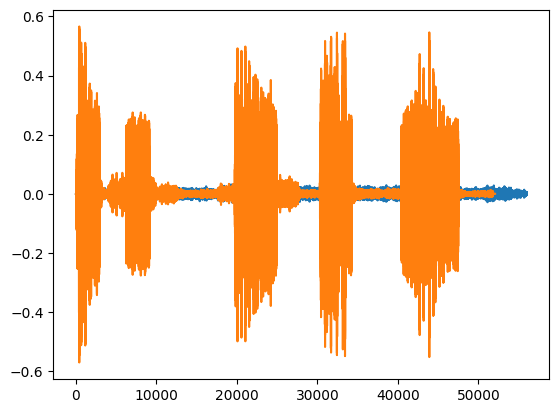

In [8]:
plt.plot(wav)
plt.plot(nwav)
plt.show()

In [9]:
positive=os.path.join('/content/drive/MyDrive/audioDATA/_data_/Parsed_Capuchinbird_Clips')

negative=os.path.join('/content/drive/MyDrive/audioDATA/_data_/Parsed_Not_Capuchinbird_Clips')

## crate tensorflow dataset<br>
create a list of the files of dataset, <br>
from the path of the positive datasert

In [10]:
positive=tf.data.Dataset.list_files(positive+'/*.wav')
negative=tf.data.Dataset.list_files(negative+'/*.wav')

In [11]:
positive=tf.data.Dataset.zip((positive,tf.data.Dataset.from_tensor_slices(tf.ones(len(positive)))))
negative=tf.data.Dataset.zip((negative,tf.data.Dataset.from_tensor_slices(tf.zeros(len(negative)))))

In [12]:
# for _ in positive:
#   print(_)

In [13]:
data=positive.concatenate(negative)

In [14]:
data.shuffle(1000).as_numpy_iterator().next()

(b'/content/drive/MyDrive/audioDATA/_data_/Parsed_Not_Capuchinbird_Clips/dove-sound-effect-1.wav',
 0.0)

calculate wave cycle length

In [15]:
path_p='/content/drive/MyDrive/audioDATA/_data_/Parsed_Capuchinbird_Clips'

In [16]:
length=[]
for file in os.listdir(path_p):
  tensor_wave=load_wav_16k_mono(os.path.join(path_p,file))
  length.append(len(tensor_wave))

In [17]:
# print(*length)

In [18]:
mean= tf.math.reduce_mean(length)#average length
print("Average capuchin bird call length\t:",int(mean)/16000,"s")

min=tf.math.reduce_min(length)
print("Minimum capuchin bird call length\t:",int(min)/16000,"s")

max=tf.math.reduce_max(length)
print("maximum capuchin bird call length\t:",int(max)/16000,"s")

Average capuchin bird call length	: 3.38475 s
Minimum capuchin bird call length	: 2.0 s
maximum capuchin bird call length	: 5.0 s


In [19]:
def preprocess(file_path,labl):
  wav=load_wav_16k_mono(file_path)
  wav=wav[:48000]
  zero_padding=tf.zeros([48000]-tf.shape(wav),dtype=tf.float32)
  wav=tf.concat([zero_padding,wav],0)
  spectrogram=tf.signal.stft(wav,frame_length=320,frame_step=32)
  spectrogram=tf.abs(spectrogram)
  spectrogram=tf.expand_dims(spectrogram,axis=2)
  return(spectrogram,labl)



In [20]:
# wav=load_wav_16k_mono(capuchin_path)
# print(wav)
# len(wav)

In [21]:
# wav=wav[:48000]
# print(wav)
# # len(wav)

In [22]:
# zero_padding=tf.zeros([48000]-tf.shape(wav),dtype=tf.float32)
# print(zero_padding)
# len(zero_padding)

In [23]:
# tf.shape(wav)

In [24]:
# wav=tf.concat([zero_padding,wav],0)
# spectrogram=tf.signal.stft(wav,frame_length=320,frame_step=32)
# spectrogram=tf.abs(spectrogram)
# spectrogram=tf.expand_dims(spectrogram,axis=2) # add's the extra axis in the


In [25]:
# spectrogram

In [26]:
# plt.figure(figsize=(30,20))
# plt.imshow(tf.transpose(spectrogram)[0])
# plt.show()

In [27]:
for _ in range(len(length)-1):
  data.as_numpy_iterator().next()


In [30]:
!git init




Reinitialized existing Git repository in /content/.git/
fatal: pathspec 'audio_classify.ipynb' did not match any files


In [34]:
!git add "/content/drive/MyDrive/Colab Notebooks/audio_classify.ipynb"

In [ ]:
!git status

In [38]:
!git config --global user.email "prateekpatriotasme@gmail.com"
!git config --global user.name "prateek271"


In [39]:
!git commit -m "add files necessary"


[master (root-commit) 5afe909] add files necessary
 1 file changed, 1 insertion(+)
 create mode 100644 drive/MyDrive/Colab Notebooks/audio_classify.ipynb


In [42]:
!git push "https://github.com/praTeek271/Audio_Classification.git" "main"

error: src refspec main does not match any
error: failed to push some refs to 'https://github.com/praTeek271/Audio_Classification.git'
